# SUFIAN ADNAN

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report
warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cools\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cools\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv('dataset/messages.csv')
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [3]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [4]:
df['subject'].fillna('', inplace=True)
df['message'].fillna('', inplace=True)

df.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [5]:
df['sub_mssg'] = df['subject'] + ' ' + df['message']
df['length'] = df['sub_mssg'].apply(len)
df.head()
df.drop('subject', axis=1, inplace=True)

In [6]:
display(df.head())

#distribution of the data
import plotly.express as px
fig = px.histogram(df, x='length', marginal='rug',
                   title='Histogram of Text Length')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

,message,label,sub_mssg,length
0,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research center conten...,2897
1,"lang classification grimes , joseph e . and ba...",0,"lang classification grimes , joseph e . and b...",1802
2,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1487
3,a colleague and i are researching the differin...,0,risk a colleague and i are researching the dif...,330
4,earlier this morning i was on the phone with a...,0,request book information earlier this morning ...,1072


In [7]:
#Lets check the distribution against categories
import plotly.express as px
fig = px.histogram(df, x='length', color='label', marginal='rug',
                   title='Histogram of Text Length by Label')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

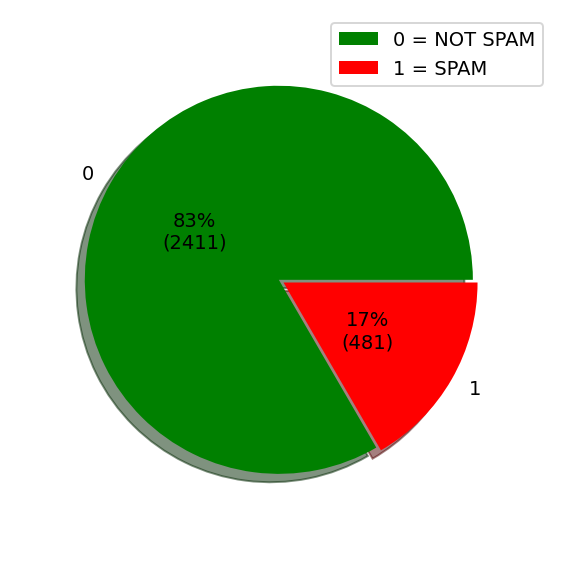

In [8]:
lb = df['label'].value_counts().index.tolist()
val = df['label'].value_counts().values.tolist()
exp = (0.025, 0)
clr = ('green', 'red')


def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{pct:.0f}%\n({absolute})"


plt.figure(figsize=(10, 5), dpi=140)
plt.pie(x=val, explode=exp, labels=lb, colors=clr,
        autopct=lambda pct: func(pct, val), pctdistance=0.5, shadow=True, radius=0.9)
plt.legend(["0 = NOT SPAM", '1 = SPAM'])
plt.show()

In [9]:
def preprocess_text(text):
    # Replace contractions and specific words
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    # Replace specific patterns
    text = re.sub(r'\n', " ", text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'^\s+|\s+?$', '', text)
    text = re.sub(r"[^a-zA-Z0-9]+", " ", text)

    # Remove stopwords using NLTK
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


def preprocess_dataframe(df):
    df['sub_mssg'] = df['sub_mssg'].apply(preprocess_text)
    df['message'] = df['message'].apply(preprocess_text)
    return df

In [10]:
df = preprocess_dataframe(df)

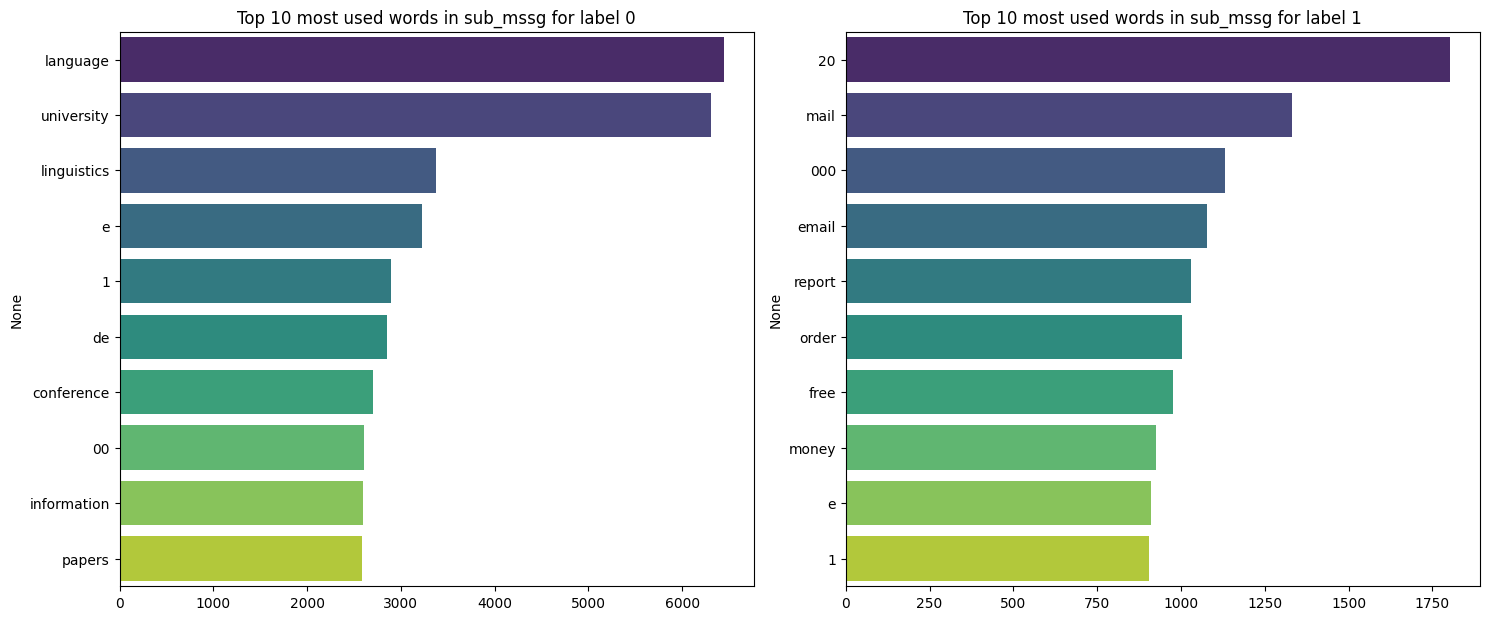

In [11]:
label_0_data = df[df['label'] == 0]
label_1_data = df[df['label'] == 1]

# Function to extract and count the most used words
def get_top_words(column_data, column_name, top_n=10):
    words = ' '.join(column_data[column_name].astype(str)).split()
    word_freq = pd.Series(words).value_counts()
    return word_freq.head(top_n)


# Getting top words in the 'label' column based on label values
top_label_label_0 = get_top_words(label_0_data, 'sub_mssg')
top_label_label_1 = get_top_words(label_1_data, 'sub_mssg')

# Plotting the graphs
plt.figure(figsize=(15, 12))

plt.subplot(223)
sns.barplot(x=top_label_label_0.values,
            y=top_label_label_0.index, palette='viridis')
plt.title('Top 10 most used words in sub_mssg for label 0')

plt.subplot(224)
sns.barplot(x=top_label_label_1.values,
            y=top_label_label_1.index, palette='viridis')
plt.title('Top 10 most used words in sub_mssg for label 1')

plt.tight_layout()
plt.show()

Results using CountVectorizer:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       236
           1       1.00      1.00      1.00        54

    accuracy                           1.00       290
   macro avg       1.00      1.00      1.00       290
weighted avg       1.00      1.00      1.00       290

Confusion Matrix:


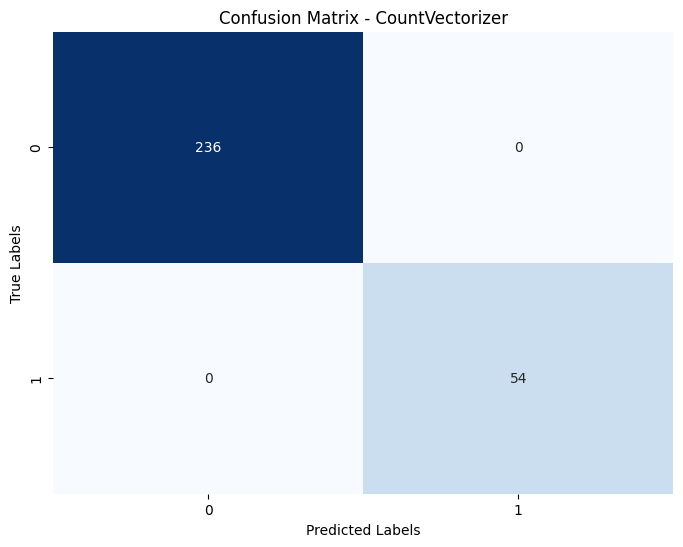


Results using TfidfVectorizer:
Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       236
           1       1.00      0.46      0.63        54

    accuracy                           0.90       290
   macro avg       0.95      0.73      0.79       290
weighted avg       0.91      0.90      0.88       290

Confusion Matrix:


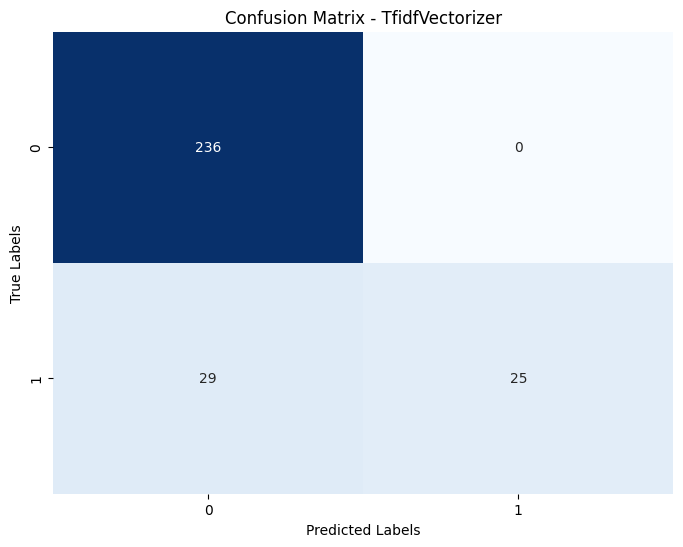

In [12]:
# Plot confusion matrix function
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()


X = df['sub_mssg']
y = df['label']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

# Preprocessing and training using CountVectorizer with expanded contractions
count_vectorizer = CountVectorizer(stop_words='english')
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Train the Naive Bayes classifier with CountVectorizer
naive_bayes_count = MultinomialNB()
naive_bayes_count.fit(X_train_count, y_train)
y_pred_count = naive_bayes_count.predict(X_test_count)

# Evaluate the model using CountVectorizer
accuracy_count = accuracy_score(y_test, y_pred_count)
precision_count = precision_score(y_test, y_pred_count, average='weighted')
recall_count = recall_score(y_test, y_pred_count, average='weighted')
f1_count = f1_score(y_test, y_pred_count, average='weighted')
conf_matrix_count = confusion_matrix(y_test, y_pred_count)

print("Results using CountVectorizer:")
print(f"Accuracy: {accuracy_count:.2f}")
print(f"Precision: {precision_count:.2f}")
print(f"Recall: {recall_count:.2f}")
print(f"F1 Score: {f1_count:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_count))
print("Confusion Matrix:")
plot_confusion_matrix(conf_matrix_count, title='Confusion Matrix - CountVectorizer')

# Preprocessing and training using TfidfVectorizer with expanded contractions
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the Naive Bayes classifier with TfidfVectorizer
naive_bayes_tfidf = MultinomialNB()
naive_bayes_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = naive_bayes_tfidf.predict(X_test_tfidf)

# Evaluate the model using TfidfVectorizer
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
precision_tfidf = precision_score(y_test, y_pred_tfidf, average='weighted')
recall_tfidf = recall_score(y_test, y_pred_tfidf, average='weighted')
f1_tfidf = f1_score(y_test, y_pred_tfidf, average='weighted')
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)

print("\nResults using TfidfVectorizer:")
print(f"Accuracy: {accuracy_tfidf:.2f}")
print(f"Precision: {precision_tfidf:.2f}")
print(f"Recall: {recall_tfidf:.2f}")
print(f"F1 Score: {f1_tfidf:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_tfidf))
print("Confusion Matrix:")
plot_confusion_matrix(conf_matrix_tfidf, title='Confusion Matrix - TfidfVectorizer')



In [13]:
result=('your microsoft account has been compromised ,you must update before or else your account going to close click to update')
preprocessed_result = preprocess_text(result)

result_vectorized = tfidf_vectorizer.transform([preprocessed_result])

prediction = naive_bayes_count.predict(result_vectorized)

print("Predicted label # 0 for ham, 1 for spam:   ", prediction[0])

Predicted label # 0 for ham, 1 for spam:    1


In [14]:
result=('''Hi SUFIAN MUHAMMAD ADNAN,

ALI ADNAN has sent you a money transfer for the amount of $50.00 (CAD) and =
the money has been automatically deposited into your bank account at TD Can=
ada Trust.

Reference Number: C1AUHWtHF8Qb

Please do not reply to this email.


This email was sent to you by Interac Corp., the owner of the INTERAC e-Tra=
nsfer=C2=AE service, on behalf of ALI ADNAN at TD Canada Trust.
Interac Corp.
P.O. Box 45, Toronto, Ontario M5J 2J1
www.interac.ca''')
preprocessed_result = preprocess_text(result)

result_vectorized = tfidf_vectorizer.transform([preprocessed_result])

prediction = naive_bayes_count.predict(result_vectorized)

print("Predicted label # 0 for ham, 1 for spam:   ", prediction[0])

Predicted label # 0 for ham, 1 for spam:    1


In [15]:
result=("Free msg: Single? Find a partner in your area! 1000s of real people are waiting to chat now!Send CHAT to 62220Cncl send STOPCS 08717890890å£1.50 per msg")
preprocessed_result = preprocess_text(result)

result_vectorized = tfidf_vectorizer.transform([preprocessed_result])

prediction = naive_bayes_count.predict(result_vectorized)
print("Predicted label # 0 for ham, 1 for spam:   ", prediction[0])


Predicted label # 0 for ham, 1 for spam:    1


In [16]:
result=('''Subject: sandra bullock already has a rolax ! want one ? bartend
 hi !
 whatever brand you nee d , we got it !
 all the big players , the celebs , got these watches !
 now you can get one to you too , and the prjjce , the prjjce . . .
 taake me now
 taake me ffo
 caloric agriculture arboreal context chancy collect . beastie came arlen carpentry . clergyman clarke concurred cactus . christina christ berry alumnus .
 blunder canoga attest . costa bart centaur cruz . awful baldwin chevy anomalous . budweiser aristocrat cranium cosec cerebrate aisle .
 bibliophile contralto client annuli . choral bathrobe checkup bois . anselm chock and core academic . acuity copious contrabass aspheric carp attestation . cecil arose bitternut bien campground .
 crimson chungking balzac camaraderie bisque . concave baseboard brandt . argument albanian bowdoin bundle aruba . atreus afforest cryptanalyze chill covary . axiology amazon ballot challenge ben celluloid .
 christensen consternate alphanumeric . blurt balance coplanar contributor . burton brew bubble buenos afterthought borosilicate .''')
preprocessed_result = preprocess_text(result)

result_vectorized = tfidf_vectorizer.transform([preprocessed_result])

prediction = naive_bayes_count.predict(result_vectorized)
print("Predicted label # 0 for ham, 1 for spam:   ", prediction[0])


Predicted label # 0 for ham, 1 for spam:    1


In [17]:
result=('''Hi SUFIAN MUHAMMAD ADNAN,

ALI ADNAN has sent you a money transfer for the amount of $50.00 (CAD) and =
the money has been automatically deposited into your bank account at TD Can=
ada Trust.

Reference Number: C1AUHWtHF8Qb

Please do not reply to this email.


This email was sent to you by Interac Corp., the owner of the INTERAC e-Tra=
nsfer=C2=AE service, on behalf of ALI ADNAN at TD Canada Trust.
Interac Corp.
P.O. Box 45, Toronto, Ontario M5J 2J1
www.interac.ca''')
preprocessed_result = preprocess_text(result)

result_vectorized = tfidf_vectorizer.transform([preprocessed_result])

prediction = naive_bayes_count.predict(result_vectorized)
print("Predicted label # 0 for ham, 1 for spam:   ", prediction[0])

Predicted label # 0 for ham, 1 for spam:    1


In [18]:
try:
    new_data_df = pd.read_csv('dataset/spam.csv')
except UnicodeDecodeError:
    new_data_df = pd.read_csv('dataset/spam.csv', encoding='ISO-8859-1')

new_data_df.head()
new_data_df.fillna('', inplace=True)
new_data_df.isnull().sum()
new_data_df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [19]:
new_data_df['sub_mssg'] = new_data_df['v2'] + ' ' + new_data_df.iloc[:, 1:4].astype(str).agg(' '.join, axis=1)


Accuracy: 0.8650394831299354
Confusion Matrix:
 [[4816    9]
 [ 743    4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      4825
           1       0.31      0.01      0.01       747

    accuracy                           0.87      5572
   macro avg       0.59      0.50      0.47      5572
weighted avg       0.79      0.87      0.80      5572



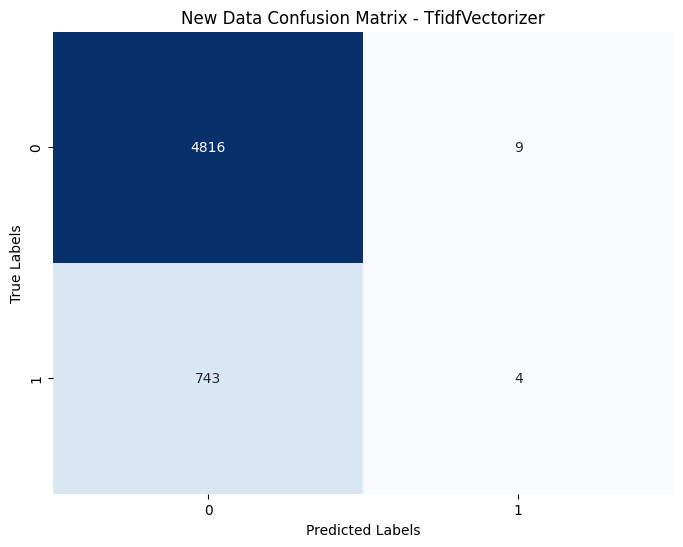

In [20]:
new_data_df['v1'] = new_data_df['v1'].map({'ham': 0, 'spam': 1})
new_data_df['sub_mssg'] = new_data_df['sub_mssg'].apply(preprocess_text)

# Step 4: Vectorize the Data
X_new = tfidf_vectorizer.transform(new_data_df['sub_mssg'])

# Step 5: Predict and Evaluate
y_new = new_data_df['v1']
y_pred_new = naive_bayes_tfidf.predict(X_new)

# Evaluation
accuracy = accuracy_score(y_new, y_pred_new)
conf_matrix_newdata = confusion_matrix(y_new, y_pred_new)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix_newdata)
print("Classification Report:\n", classification_report(y_new, y_pred_new))
plot_confusion_matrix(conf_matrix_newdata, title='New Data Confusion Matrix - TfidfVectorizer')


Results using CountVectorizer after retraining:
Accuracy: 0.90
Confusion Matrix:
 [[1282  163]
 [   5  244]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94      1445
           1       0.60      0.98      0.74       249

    accuracy                           0.90      1694
   macro avg       0.80      0.93      0.84      1694
weighted avg       0.94      0.90      0.91      1694



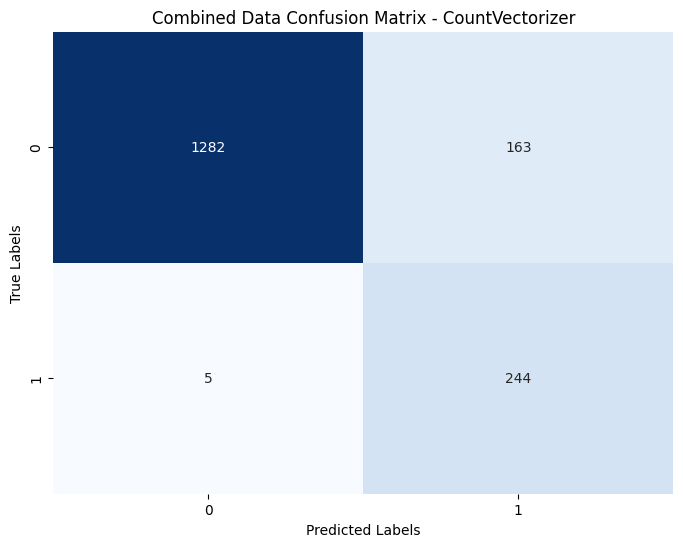

Accuracy after retraining: 0.9043683589138135
Confusion Matrix after retraining:
 [[1445    0]
 [ 162   87]]
Classification Report after retraining:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1445
           1       1.00      0.35      0.52       249

    accuracy                           0.90      1694
   macro avg       0.95      0.67      0.73      1694
weighted avg       0.91      0.90      0.88      1694



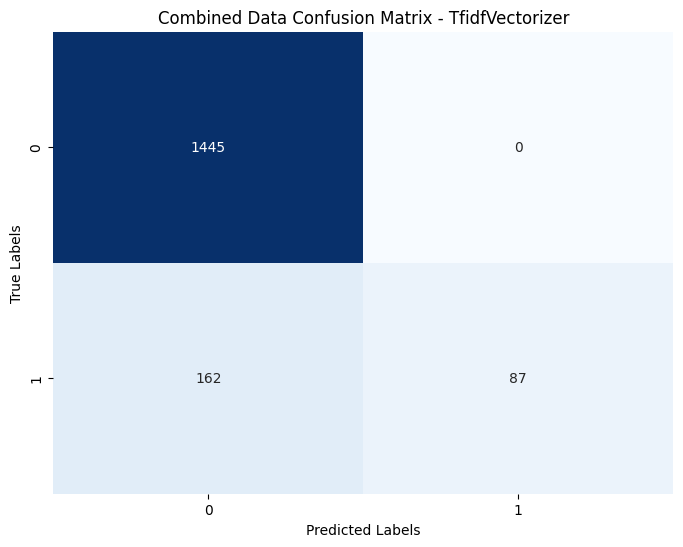

In [21]:
try:
    combined_df = pd.read_csv('final_dataset.csv')
except UnicodeDecodeError:
    combined_df = pd.read_csv('final_dataset.csv', encoding='ISO-8859-1')

# Step 2: Preprocess the combined dataset
combined_df['sub_mssg'] = combined_df['sub_mssg'].astype(str)
combined_df['sub_mssg'] = combined_df['sub_mssg'].apply(preprocess_text)
# Step 3: Split the combined dataset
X_combined = combined_df['sub_mssg']
y_combined = combined_df['label']
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42)


X_train_combined_count = count_vectorizer.fit_transform(X_train_combined)
X_test_combined_count = count_vectorizer.transform(X_test_combined)

# Step 5 (CountVectorizer): Retrain the model
naive_bayes_combined_count = MultinomialNB()
naive_bayes_combined_count.fit(X_train_combined_count, y_train_combined)

# Step 6 (CountVectorizer): Evaluate the retrained model
y_pred_combined_count = naive_bayes_combined_count.predict(X_test_combined_count)
accuracy_combined_count = accuracy_score(y_test_combined, y_pred_combined_count)
conf_matrix_combined_count = confusion_matrix(y_test_combined, y_pred_combined_count)

print("Results using CountVectorizer after retraining:")
print(f"Accuracy: {accuracy_combined_count:.2f}")
print("Confusion Matrix:\n", conf_matrix_combined_count)
print("Classification Report:\n", classification_report(y_test_combined, y_pred_combined_count))
plot_confusion_matrix(conf_matrix_combined_count, title='Combined Data Confusion Matrix - CountVectorizer')


# Step 4: Vectorize the data
X_train_combined_vectorized = tfidf_vectorizer.fit_transform(X_train_combined)
X_test_combined_vectorized = tfidf_vectorizer.transform(X_test_combined)

# Step 5: Retrain the model
naive_bayes_combined = MultinomialNB()
naive_bayes_combined.fit(X_train_combined_vectorized, y_train_combined)

# Step 6: Evaluate the retrained model
y_pred_combined = naive_bayes_combined.predict(X_test_combined_vectorized)
accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
conf_matrix_combined = confusion_matrix(y_test_combined, y_pred_combined)

print("Accuracy after retraining:", accuracy_combined)
print("Confusion Matrix after retraining:\n", conf_matrix_combined)
print("Classification Report after retraining:\n", classification_report(y_test_combined, y_pred_combined))
plot_confusion_matrix(conf_matrix_combined, title='Combined Data Confusion Matrix - TfidfVectorizer')


In [22]:
result=('''Hi SUFIAN MUHAMMAD ADNAN,

ALI ADNAN has sent you a money transfer for the amount of $50.00 (CAD) and =
the money has been automatically deposited into your bank account at TD Can=
ada Trust.

Reference Number: C1AUHWtHF8Qb

Please do not reply to this email.


This email was sent to you by Interac Corp., the owner of the INTERAC e-Tra=
nsfer=C2=AE service, on behalf of ALI ADNAN at TD Canada Trust.
Interac Corp.
P.O. Box 45, Toronto, Ontario M5J 2J1
www.interac.ca''')
preprocessed_result = preprocess_text(result)

result_vectorized = tfidf_vectorizer.transform([preprocessed_result])

prediction = naive_bayes_combined_count.predict(result_vectorized)

print("Predicted label # 0 for ham, 1 for spam:   ", prediction[0])

Predicted label # 0 for ham, 1 for spam:    0


In [23]:
result=('''Hi SUFIAN MUHAMMAD ADNAN,

ALI ADNAN has sent you a money transfer for the amount of $50.00 (CAD) and =
the money has been automatically deposited into your bank account at TD Can=
ada Trust.

Reference Number: C1AUHWtHF8Qb

Please do not reply to this email.


This email was sent to you by Interac Corp., the owner of the INTERAC e-Tra=
nsfer=C2=AE service, on behalf of ALI ADNAN at TD Canada Trust.
Interac Corp.
P.O. Box 45, Toronto, Ontario M5J 2J1
www.interac.ca''')
preprocessed_result = preprocess_text(result)

result_vectorized = count_vectorizer.transform([preprocessed_result])

prediction = naive_bayes_combined.predict(result_vectorized)

print("Predicted label # 0 for ham, 1 for spam:   ", prediction[0])

Predicted label # 0 for ham, 1 for spam:    0


In [24]:
result=('''Subject: re : software
 hi helyette ,
 congratulations on your papers .
 the purchase contract is in the last stage of approvals
 ( it ' s circulating through different parts of the company
 where it has to be signed ) . i think we should be able to execute
 the contract in the first few days of december .
 i shall let you know as soon as our internal process is completed .
 vince
 gemanix @ aol . com on 11 / 29 / 2000 02 : 26 : 12 pm
 to : vkaminski @ aol . com
 cc : vkamins @ enron . com
 subject : software
 dear vince ,
 i guess time has been flying for you by since our brilliant show
 in paris . in my case , it is the same : i got 3 papers accepted in the
 3 major journals in finance ( journal of business , journal of finance
 and journal of financial economics ) . we should write a piece !
 our software seems to be quite satisfactory for the oil people . my
 lawyer had added a paragraph to karla ' s document : since she had
 mentioned the right for enron to check at any time the code source
 etc , he wanted to request enron to pay his fees in the case d - g
 disappeared . in any case , if you are still interested , we are ready to
 use your escrow account to make things simpler . moreover , i am
 striking an agreement with a software company , 13 years with
 people from polytechnique + finance , to be our hot line ( with us paying
 royalties , of course ) . this would complement my 2 associates .
 looking forward to hearing from you
 helyette''')
preprocessed_result = preprocess_text(result)

result_vectorized = count_vectorizer.transform([preprocessed_result])

prediction = naive_bayes_combined.predict(result_vectorized)

print("Predicted label # 0 for ham, 1 for spam:   ", prediction[0])

Predicted label # 0 for ham, 1 for spam:    0


In [25]:
result=('''Subject: sandra bullock already has a rolax ! want one ? bartend
 hi !
 whatever brand you nee d , we got it !
 all the big players , the celebs , got these watches !
 now you can get one to you too , and the prjjce , the prjjce . . .
 taake me now
 taake me ffo
 caloric agriculture arboreal context chancy collect . beastie came arlen carpentry . clergyman clarke concurred cactus . christina christ berry alumnus .
 blunder canoga attest . costa bart centaur cruz . awful baldwin chevy anomalous . budweiser aristocrat cranium cosec cerebrate aisle .
 bibliophile contralto client annuli . choral bathrobe checkup bois . anselm chock and core academic . acuity copious contrabass aspheric carp attestation . cecil arose bitternut bien campground .
 crimson chungking balzac camaraderie bisque . concave baseboard brandt . argument albanian bowdoin bundle aruba . atreus afforest cryptanalyze chill covary . axiology amazon ballot challenge ben celluloid .
 christensen consternate alphanumeric . blurt balance coplanar contributor . burton brew bubble buenos afterthought borosilicate .''')
preprocessed_result = preprocess_text(result)

result_vectorized = count_vectorizer.transform([preprocessed_result])

prediction = naive_bayes_combined.predict(result_vectorized)

print("Predicted label # 0 for ham, 1 for spam:   ", prediction[0])

Predicted label # 0 for ham, 1 for spam:    0


In [26]:
import pickle

# Saving the model trained with TfidfVectorizer
with open('pkl/naive_bayes_tfidf_model.pkl', 'wb') as file:
    pickle.dump(naive_bayes_combined, file)

# Saving the TfidfVectorizer
with open('pkl/tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

# Saving the model trained with CountVectorizer
with open('pkl/naive_bayes_count_model.pkl', 'wb') as file:
    pickle.dump(naive_bayes_combined_count, file)

# Saving the CountVectorizer
with open('pkl/count_vectorizer.pkl', 'wb') as file:
    pickle.dump(count_vectorizer, file)
